In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def DNN(imgpath):
    modelFile = r'/home/pushpesh/Videos/proj/DNN_cv2/res10_300x300_ssd_iter_140000.caffemodel'
    configFile = r'/home/pushpesh/Videos/proj/DNN_cv2/deploy.prototxt.txt'
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.12:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 3)
 
    plt.imshow( frame)
    plt.show()

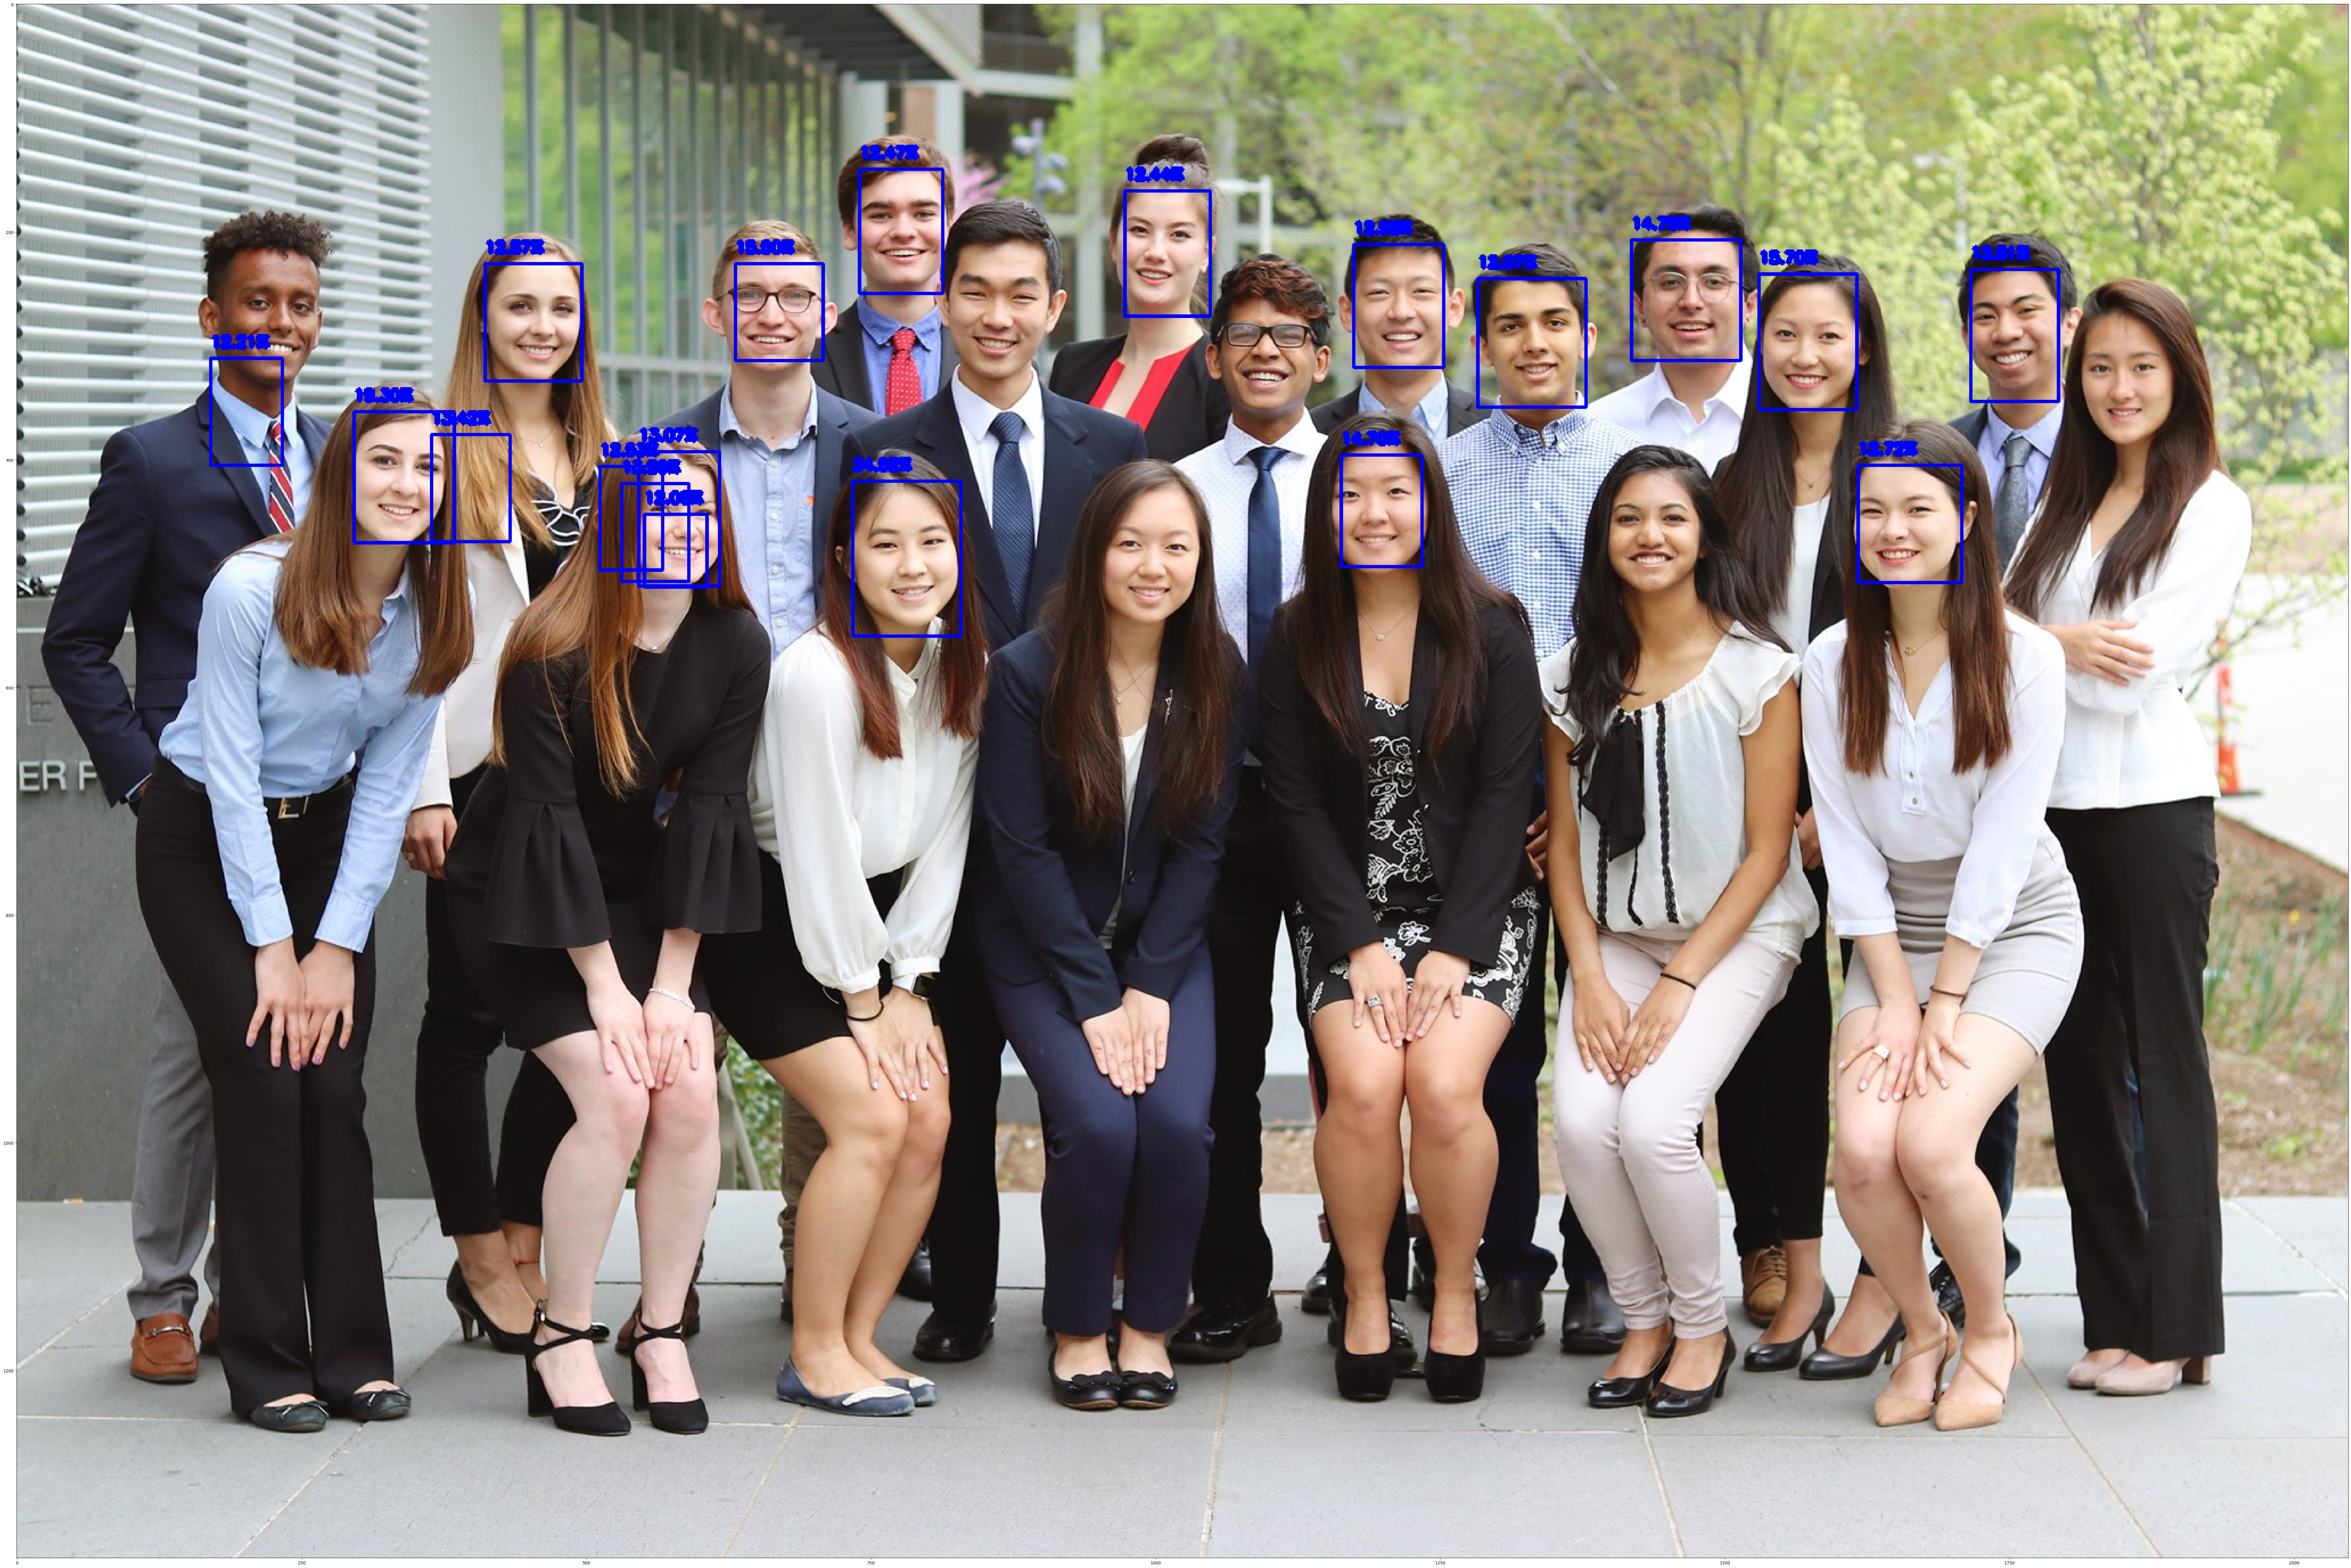

In [3]:
fig = plt.figure(figsize=(100,100))
DNN(r'/home/pushpesh/Videos/proj/img/test2.jpg')